In [25]:
import pandas as pd
%matplotlib
# 读取数据
df = pd.read_csv('./crime_data_20190322.csv')

df.head()


Using matplotlib backend: Qt5Agg


,crime,locname,incidentdatetime,publicadress,agency,accuracy
0,DRUG/NARCOTIC VIOLATIONS,COMMERCIAL/OFFICE BUILDING,2009-12-31 00:26:00,30XX COLORADO BLVD,Denton Police Department,Address
1,ALL OTHER OFFENSES,HIGHWAY/ROAD/ALLEY,2009-12-31 00:59:00,39XX E MCKINNEY ST,Denton Police Department,Address
2,DRIVING UNDER THE INFLUENCE,HIGHWAY/ROAD/ALLEY,2009-12-31 02:08:14,LINDSEY ST // FORT WORTH DR,Denton Police Department,Intersection
3,DRUNKENNESS,BAR/NIGHT CLUB,2009-12-31 02:51:17,10XX S AVE C,Denton Police Department,Address
4,DRUNKENNESS,HIGHWAY/ROAD/ALLEY,2009-12-31 02:44:49,13XX W HICKORY ST,Denton Police Department,Address


In [2]:
df.crime.value_counts().iloc[:10]

SIMPLE ASSAULT                              8218
ALL OTHER LARCENY                           7867
DESTRUCTIVE/DAMAGE/VANDALISM OF PROPERTY    6739
DRUNKENNESS                                 6721
SHOPLIFTING                                 5965
THEFT FROM MOTOR VEHICLE                    5668
DRUG/NARCOTIC VIOLATIONS                    5047
FALSE PRETENSE/SWINDLE/CONFIDENCE GAME      4694
BURGLARY/BREAKING AND ENTERING              4496
DRIVING UNDER THE INFLUENCE                 4456
Name: crime, dtype: int64

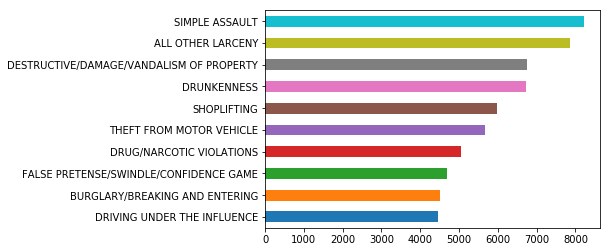

In [4]:
df.crime.value_counts().iloc[:10].sort_values().plot(kind='barh')

In [5]:
# 分析抢劫类型
robbery = df[df.crime.str.contains('ROBBERY')]
robbery.head()

,crime,locname,incidentdatetime,publicadress,agency,accuracy
124,ROBBERY,SPECIALTY STORE,2010-01-05 16:45:00,19XX BRINKER RD,Denton Police Department,Address
126,ROBBERY,RESIDENCE/HOME,2010-01-05 16:30:00,4XX BERNARD ST,Denton Police Department,Address
585,ROBBERY,RESIDENCE/HOME,2010-01-24 22:00:00,20XX TEASLEY LN,Denton Police Department,Address
1009,ROBBERY,RESIDENCE/HOME,2010-02-03 23:00:00,6XX W SYCAMORE ST,Denton Police Department,Address
1155,ROBBERY,DEPARTMENT/DISCOUNT STORE,2010-02-22 19:30:00,22XX S I35E,Denton Police Department,Address


In [6]:
robbery.shape

(666, 6)

In [19]:
robbery.groupby('locname').size().sort_values()

locname
AIR/BUS/TRAIN TERMINAL                   1
PARKING LOT/GARAGE                       1
SCHOOL/COLLEGE                           1
SERVICE/GAS STATION                      1
COMMERCIAL/OFFICE BUILDING               1
SCHOOL-ELEMENTARY/SECONDARY              1
CAMP/CAMPGROUND                          1
GOVERNMENT/PUBLIC BUILDING               2
SHOPPING MALL                            2
LIQUOR STORE                             2
BAR/NIGHT CLUB                           3
CHURCH/SYNAGOGUE/TEMPLE                  3
PARK/PLAYGROUND                          5
DRUG STORE/DOCTOR'S OFFICE/HOSPITAL      6
GROCERY/SUPERMARKET                      6
FIELD/WOODS                             11
OTHER/UNKNOWN                           19
BANK/SAVINGS AND LOAN                   22
HOTEL/MOTEL/ETC.                        28
SPECIALTY STORE                         30
RESTAURANT                              50
HIGHWAY/ROAD/ALLEY                      50
DEPARTMENT/DISCOUNT STORE               54
CON

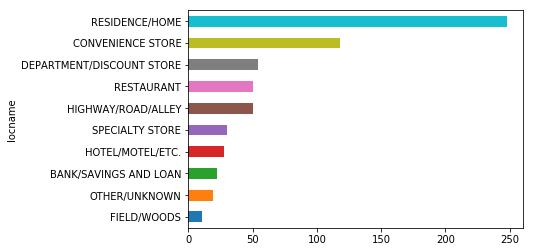

In [21]:
robbery.groupby('locname').size().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')

In [22]:
# 分析街区
robbery = df[df.crime.str.contains('ROBBERY')]
robbery.head()

,crime,locname,incidentdatetime,publicadress,agency,accuracy
124,ROBBERY,SPECIALTY STORE,2010-01-05 16:45:00,19XX BRINKER RD,Denton Police Department,Address
126,ROBBERY,RESIDENCE/HOME,2010-01-05 16:30:00,4XX BERNARD ST,Denton Police Department,Address
585,ROBBERY,RESIDENCE/HOME,2010-01-24 22:00:00,20XX TEASLEY LN,Denton Police Department,Address
1009,ROBBERY,RESIDENCE/HOME,2010-02-03 23:00:00,6XX W SYCAMORE ST,Denton Police Department,Address
1155,ROBBERY,DEPARTMENT/DISCOUNT STORE,2010-02-22 19:30:00,22XX S I35E,Denton Police Department,Address


In [26]:
regex = r"\d+XX\s(?P<street>.*)"
subst = "\\g<street>"
"""
这里，我们用括号把需要保留的内容，赋值为 street 分组。然后替换的时候，
只保留这个分组的信息。于是前面的具体地址数字就忽略了。
调用 Pandas 的 str.replace 函数，我们可以让它自动将每一个地址都进行解析替换，
并且把结果存入到了一个新的列名称，即 street 。
"""
robbery["street"] = robbery.publicadress.str.replace(regex, subst)

In [27]:
robbery.head()

,crime,locname,incidentdatetime,publicadress,agency,accuracy,street
124,ROBBERY,SPECIALTY STORE,2010-01-05 16:45:00,19XX BRINKER RD,Denton Police Department,Address,BRINKER RD
126,ROBBERY,RESIDENCE/HOME,2010-01-05 16:30:00,4XX BERNARD ST,Denton Police Department,Address,BERNARD ST
585,ROBBERY,RESIDENCE/HOME,2010-01-24 22:00:00,20XX TEASLEY LN,Denton Police Department,Address,TEASLEY LN
1009,ROBBERY,RESIDENCE/HOME,2010-02-03 23:00:00,6XX W SYCAMORE ST,Denton Police Department,Address,W SYCAMORE ST
1155,ROBBERY,DEPARTMENT/DISCOUNT STORE,2010-02-22 19:30:00,22XX S I35E,Denton Police Department,Address,S I35E


In [28]:
robbery.groupby('street').size().sort_values(ascending=False).head(10)

street
W UNIVERSITY DR    54
S I35E             45
E MCKINNEY ST      30
S LOOP 288         27
TEASLEY LN         27
FORT WORTH DR      21
I35                20
W OAK ST           17
BERNARD ST         14
N ELM ST           12
dtype: int64

In [29]:
from dateutil.parser import *


In [30]:
robbery["year"] = robbery.incidentdatetime.apply(lambda x: parse(x).year)

In [31]:
robbery["month"] = robbery.incidentdatetime.apply(lambda x: parse(x).month)

robbery["hour"] = robbery.incidentdatetime.apply(lambda x: parse(x).hour)

In [32]:
robbery.head()

,crime,locname,incidentdatetime,publicadress,agency,accuracy,street,year,month,hour
124,ROBBERY,SPECIALTY STORE,2010-01-05 16:45:00,19XX BRINKER RD,Denton Police Department,Address,BRINKER RD,2010,1,16
126,ROBBERY,RESIDENCE/HOME,2010-01-05 16:30:00,4XX BERNARD ST,Denton Police Department,Address,BERNARD ST,2010,1,16
585,ROBBERY,RESIDENCE/HOME,2010-01-24 22:00:00,20XX TEASLEY LN,Denton Police Department,Address,TEASLEY LN,2010,1,22
1009,ROBBERY,RESIDENCE/HOME,2010-02-03 23:00:00,6XX W SYCAMORE ST,Denton Police Department,Address,W SYCAMORE ST,2010,2,23
1155,ROBBERY,DEPARTMENT/DISCOUNT STORE,2010-02-22 19:30:00,22XX S I35E,Denton Police Department,Address,S I35E,2010,2,19


In [33]:
robbery.groupby('year').size()

year
2010    65
2011    54
2012    81
2013    64
2014    55
2015    61
2016    73
2017    94
2018    96
2019    23
dtype: int64

In [34]:
robbery = robbery[~(robbery.year == 2019)]

In [35]:
robbery.shape

(643, 10)

In [38]:
robbery.groupby('year').size().plot()

In [41]:
robbery.groupby('month').size().plot(kind='bar')

In [42]:
robbery[robbery.year==2018].groupby('month').size().plot(kind='bar')

In [43]:
robbery.groupby('hour').size().plot(kind='bar')

In [44]:
robbery[robbery.year==2018].groupby('hour').size().plot(kind='bar')

In [45]:
robbery[robbery.year==2018].groupby(['month', 'hour']).size()

month  hour
1      4       1
       18      1
       19      1
       20      3
2      1       1
       3       1
       10      1
       13      1
       19      1
3      7       1
       16      1
       20      1
4      3       1
       6       1
       10      2
       15      1
       18      1
       21      2
       22      1
5      0       2
       1       3
       8       1
       15      1
       20      2
       21      2
       22      1
6      2       1
       3       1
       5       1
       11      1
              ..
8      6       2
       9       1
       12      1
       14      1
       15      2
       23      1
9      1       1
       2       2
       5       1
       17      1
       18      1
       19      1
       21      1
10     2       1
       16      1
       18      1
       20      2
       22      1
11     9       1
       11      1
       14      1
       23      3
12     1       1
       11      2
       12      3
       16      2
       18      1
  

In [46]:
robbery[robbery.year==2018].groupby(['month', 'hour']).size().unstack(0)

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0,NaN,NaN
3,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
6,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
7,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
robbery[robbery.year==2018].groupby(['month', 'hour']).size().unstack(0).fillna(0)


month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
robbery[robbery.year==2018].groupby(['month', 'hour']).size().unstack(0).fillna(0).plot(subplots=True, kind='bar', figsize=(5,30))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026292EA5208>,
      dtype=object)